In [2]:
import time
import os
import pandas as pd
from tqdm import tqdm
import re
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service

In [32]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('headless')
driver = webdriver.Chrome(options=chrome_options)

# s = Service(executable_path='chromedriver-win64\chromedriver.exe')
# driver = webdriver.Chrome()

# driver.set_window_size(1000,1250)

In [3]:
BASE_URL = 'https://ria.ru/'
NEWS_ON_BASE_PAGE = 20
DEPTH_OF_PAGE = 400
SLEEP = 2

TOPICS = ['politics', 'world', 'economy', 'society', 'incidents', 'defense_safety']
data = pd.DataFrame(columns=['url', 'date', 'title', 'subtitle', 'view', 'topic', 'text'])

In [29]:
def get_page() -> tuple[list, list]:
    
    items, topics_order = [], []
    
    for topic in tqdm(TOPICS):
        try:
            old_size = len(items)
            URL = BASE_URL + topic
            driver.get(URL)
            time.sleep(SLEEP)
            print(URL)
            driver.execute_script("document.getElementsByClassName('list-more')[0].click()")
            time.sleep(1)

            for i in tqdm(range(DEPTH_OF_PAGE)):
                try:
                    driver.execute_script("document.getElementsByClassName('list-more')[0].click()")
                    time.sleep(1)
                except:
                    pass
                
            html = driver.page_source
            soup = BeautifulSoup(html, "html.parser")
            items += soup.find_all('div', {'class': 'list-item'})

            new_size = len(items)
            if new_size > old_size:
                topics_order.extend([topic] * (new_size - old_size))
        except:
            print('Что-то пошло не так')
            pass
        
    return items, topics_order

In [30]:
def parse_news(news, data, topic) -> pd.DataFrame:
    
    title = news.find('a', {'class':'list-item__title color-font-hover-only'}).text
    url = news.find('a', {'class':'list-item__title color-font-hover-only'}).get('href')
    view = news.find('div', {'class':'list-item__views-text'}).text
    try:
        driver.get(url)
        html = driver.page_source
        soup = BeautifulSoup(html, "html.parser")
        text = soup.find('div', {'class': 'article__body js-mediator-article mia-analytics'}).text
        date = soup.find('div', {'class': 'article__info-date'}).text
        subtitle = soup.find('h1', {'class': 'article__second-title'}).text
        

        part_of_data = pd.DataFrame({'title': [title],  'view': [view], 'text': [text], 'subtitle': subtitle, 'topic': topic,
                                    'url': url, 'date': date})
        
    except:
        text = None
        date = None
        subtitle = None
        part_of_data = pd.DataFrame({'title': [title],  'view': [view], 'text': [text], 'subtitle': subtitle, 'topic': topic,
                                    'url': url, 'date': date})
        
    return part_of_data

# Первый поиск данных производился с параметрами
- NEWS_ON_BASE_PAGE = 20
- DEPTH_OF_PAGE = 400
- SLEEP = 2

- TOPICS = ['politics', 'world', 'economy', 'society', 'incidents', 'defense_safety']

In [6]:
items, topics_order = get_page()

  0%|                                                                                            | 0/6 [00:00<?, ?it/s]

https://ria.ru/politics



 33%|██████████████████████████▏                                                     | 131/400 [02:27<05:40,  1.27s/it]


 66%|████████████████████████████████████████████████████▌                           | 263/400 [05:21<02:23,  1.05s/it]


 99%|███████████████████████████████████████████████████████████████████████████████ | 395/400 [08:58<00:09,  1.81s/it]


 17%|█████████████▊                                                                     | 1/6 [10:55<54:36, 655.39s/it]

https://ria.ru/world



 33%|██████████████████████████▏                                                     | 131/400 [02:19<05:07,  1.14s/it]


 66%|████████████████████████████████████████████████████▌                           | 263/400 [05:13<03:14,  1.42s/it]


 99%|███████████████████████████████████████████████████████████████████████████████ | 395/400 [08:46<00:08,  1.78s/it]


 33%|███████████████████████████▋                                                       | 2/6 [22:05<44:16, 664.05s/it]

https://ria.ru/economy



 33%|██████████████████████████▏                                                     | 131/400 [02:16<04:47,  1.07s/it]


 66%|████████████████████████████████████████████████████▌                           | 263/400 [04:45<02:38,  1.15s/it]


 99%|███████████████████████████████████████████████████████████████████████████████ | 395/400 [07:19<00:05,  1.18s/it]


 50%|█████████████████████████████████████████▌                                         | 3/6 [30:11<29:08, 582.91s/it]

https://ria.ru/society



 33%|██████████████████████████▏                                                     | 131/400 [02:16<04:46,  1.07s/it]


 66%|████████████████████████████████████████████████████▌                           | 263/400 [04:44<02:38,  1.16s/it]


 99%|███████████████████████████████████████████████████████████████████████████████ | 395/400 [07:21<00:06,  1.23s/it]


 67%|███████████████████████████████████████████████████████▎                           | 4/6 [38:15<18:07, 543.57s/it]

https://ria.ru/incidents



 33%|██████████████████████████▏                                                     | 131/400 [02:18<04:57,  1.11s/it]


 66%|████████████████████████████████████████████████████▌                           | 263/400 [04:52<02:50,  1.24s/it]


 99%|███████████████████████████████████████████████████████████████████████████████ | 395/400 [07:40<00:06,  1.29s/it]


 83%|█████████████████████████████████████████████████████████████████████▏             | 5/6 [47:26<09:06, 546.45s/it]

https://ria.ru/defense_safety



 33%|██████████████████████████▏                                                     | 131/400 [02:20<04:54,  1.09s/it]


 66%|████████████████████████████████████████████████████▌                           | 263/400 [05:01<03:01,  1.32s/it]


 99%|███████████████████████████████████████████████████████████████████████████████ | 395/400 [08:04<00:07,  1.56s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [57:22<00:00, 573.72s/it]


In [7]:
len(items), len(topics_order)

(41788, 41788)

In [8]:
count = 0
data = pd.read_csv('data_for_nlp_2.csv')
for news, topic in tqdm(zip(items, topics_order)):
    part = parse_news(news, data, topic)
    data = pd.concat([data, part])
    
    if count % 1000 == 0:
        data.to_csv('data_for_nlp_2.csv', index = False)
        
    count += 1
data = data.reset_index(drop=True)
data

41788it [23:49:35,  2.05s/it]


,url,date,title,subtitle,view,topic,text
0,https://ria.ru/20231021/ssha-1904417196.html,20:47 21.10.2023\n ...,Глава МИД Венесуэлы назвал причину разрыва с США,Пинто: Венесуэла всегда хотела хороших отношен...,10180,politics,"МИНСК, 21 окт - РИА Новости. Министр иностранн..."
1,https://ria.ru/20231021/ssha-1904417196.html,20:47 21.10.2023\n ...,Глава МИД Венесуэлы назвал причину разрыва с США,Пинто: Венесуэла всегда хотела хороших отношен...,14783,politics,"МИНСК, 21 окт - РИА Новости. Министр иностранн..."
2,https://ria.ru/20231021/bayden-1904394553.html,18:16 21.10.2023\n ...,"Байден заявил о планах США ""построить новый ми...","Байден пообещал, что США построят человечеству...",58330,politics,"ВАШИНГТОН, 21 окт — РИА Новости. Человечеству ..."
3,https://ria.ru/20231021/vuchich-1904392917.html,18:08 21.10.2023\n ...,Вучич сообщил о тяжелом разговоре со странами ...,Вучич: разговор со странами Запада по вопросу ...,24997,politics,"БЕЛГРАД, 21 окт — РИА Новости. Президент Серби..."
4,https://ria.ru/20231021/vybory-1904342166.html,14:04 21.10.2023\n ...,Зюганов назвал возможную дату начала кампании ...,Зюганов: кампания по выборам президента РФ мож...,20628,politics,"РОЖДЕСТВЕНО (Московская область), 21 окт — РИА..."
...,...,...,...,...,...,...,...
41784,https://ria.ru/20230130/vagner-1848290270.html,03:09 30.01.2023\n ...,"Бойцы группы ""Вагнер"" рассказали о боях против...","Бойцы группы ""Вагнер"" рассказали о боях против...",43899,defense_safety,"КЛЕЩЕЕВКА (ДНР), 30 янв — РИА Новости. Бойцы г..."
41785,https://ria.ru/20230130/ryabkov-1848289371.html,02:36 30.01.2023\n ...,Рябков предупредил о последствиях игры с поста...,Рябков: циничная игра с поставками оружия Киев...,21187,defense_safety,"МОСКВА, 30 янв — РИА Новости. Игры с поставкам..."
41786,https://ria.ru/20230129/naemniki-1848255019.html,19:14 29.01.2023\n ...,Пригожин сообщил о брошенных в Артемовске тела...,Пригожин сообщил об обнаружении в Артемовске и...,686335,defense_safety,"МОСКВА, 29 янв — РИА Новости. Российские войск..."
41787,https://radiosputnik.ria.ru/20230129/trevoga-1...,16:11 29.01.2023\n ...,В двух областях Украины второй раз за день объ...,Воздушная тревога звучала в двух областях Укра...,2614,defense_safety,"МОСКВА, 29 января/ Радио Sputnik. Воздушная тр..."


Посмотрим на получившийся результат

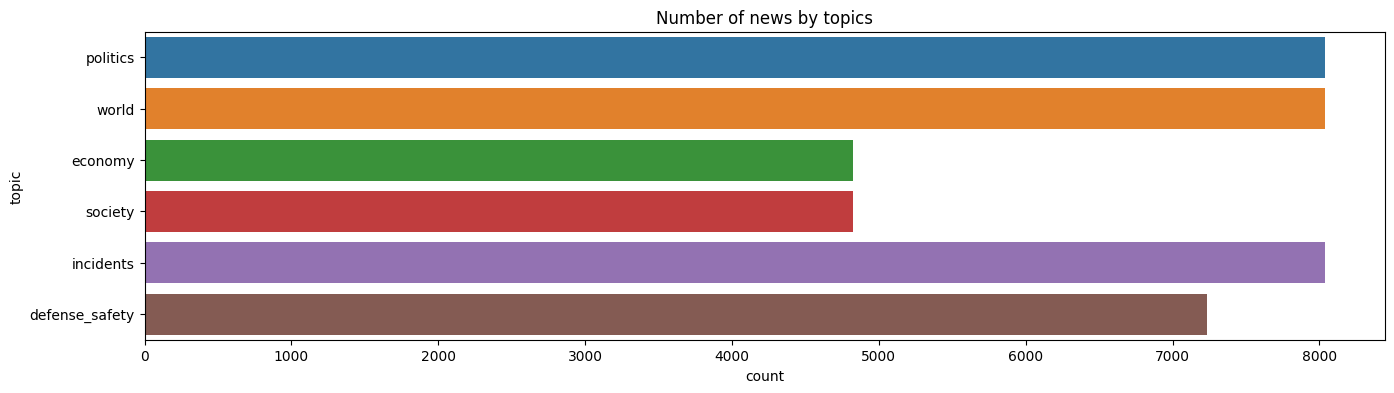

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('data_for_nlp_2.csv')

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(16,4))
sns.countplot(y=data["topic"], palette='tab10', ax=ax)
plt.title('Number of news by topics');

In [25]:
data.topic.value_counts()

politics          8041
world             8040
incidents         8040
defense_safety    7233
economy           4824
society           4824
Name: topic, dtype: int64

Проведем донабор данных по топикам _economy_ и _society_

# Второй поиск данных производился с параметрами
- BASE_URL = 'https://ria.ru/'
- NEWS_ON_BASE_PAGE = 20
- DEPTH_OF_PAGE = 670
- SLEEP = 2

- TOPICS = ['economy']

In [27]:
BASE_URL = 'https://ria.ru/'
NEWS_ON_BASE_PAGE = 20
DEPTH_OF_PAGE = 700
SLEEP = 2

TOPICS = ['economy']

In [33]:
items, topics_order = get_page()

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

https://ria.ru/economy



 19%|██████████████▉                                                                 | 131/700 [02:17<09:53,  1.04s/it]


 38%|██████████████████████████████                                                  | 263/700 [04:47<08:29,  1.17s/it]


 56%|█████████████████████████████████████████████▏                                  | 395/700 [07:31<07:04,  1.39s/it]


 75%|████████████████████████████████████████████████████████████▏                   | 527/700 [10:28<04:00,  1.39s/it]


 94%|███████████████████████████████████████████████████████████████████████████▎    | 659/700 [13:54<01:04,  1.58s/it]


100%|██████████████████████████████████████████████████████████████████████████████████| 1/1 [17:24<00:00, 1044.55s/it]


In [34]:
len(items), len(topics_order)

(8424, 8424)

In [35]:
count = 0
data = pd.read_csv('data_for_nlp_2.csv')
for news, topic in tqdm(zip(items[4000:], topics_order[4000:])):
    part = parse_news(news, data, topic)
    data = pd.concat([data, part])
    
    if count % 1000 == 0:
        data.to_csv('data_for_nlp_2.csv', index = False)
        
    count += 1
data = data.reset_index(drop=True)
data

4424it [4:41:27,  3.82s/it]


,url,date,title,subtitle,view,topic,text
0,https://ria.ru/20231021/ssha-1904417196.html,20:47 21.10.2023\n ...,Глава МИД Венесуэлы назвал причину разрыва с США,Пинто: Венесуэла всегда хотела хороших отношен...,10180,politics,"МИНСК, 21 окт - РИА Новости. Министр иностранн..."
1,https://ria.ru/20231021/ssha-1904417196.html,20:47 21.10.2023\n ...,Глава МИД Венесуэлы назвал причину разрыва с США,Пинто: Венесуэла всегда хотела хороших отношен...,14783,politics,"МИНСК, 21 окт - РИА Новости. Министр иностранн..."
2,https://ria.ru/20231021/bayden-1904394553.html,18:16 21.10.2023\n ...,"Байден заявил о планах США ""построить новый ми...","Байден пообещал, что США построят человечеству...",58330,politics,"ВАШИНГТОН, 21 окт — РИА Новости. Человечеству ..."
3,https://ria.ru/20231021/vuchich-1904392917.html,18:08 21.10.2023\n ...,Вучич сообщил о тяжелом разговоре со странами ...,Вучич: разговор со странами Запада по вопросу ...,24997,politics,"БЕЛГРАД, 21 окт — РИА Новости. Президент Серби..."
4,https://ria.ru/20231021/vybory-1904342166.html,14:04 21.10.2023\n ...,Зюганов назвал возможную дату начала кампании ...,Зюганов: кампания по выборам президента РФ мож...,20628,politics,"РОЖДЕСТВЕНО (Московская область), 21 окт — РИА..."
...,...,...,...,...,...,...,...
45421,https://ria.ru/20230314/potoki-1857891213.html,21:16 14.03.2023\n ...,"Путин объяснил, почему подрыв ""Северных потоко...","Путин объяснил, почему США теоретически заинте...",5105,economy,"МОСКВА, 14 мар - РИА Новости. США теоретически..."
45422,https://ria.ru/20230314/potok-1857883445.html,20:11 14.03.2023\n ...,"Путин заявил, что у ""Северного потока"" есть бу...","Путин: у ""Северного потока"" есть будущее, если...",8947,economy,"МОСКВА, 14 мар - РИА Новости. Будущее у ""Север..."
45423,https://ria.ru/20230314/vertolety-1857879395.html,19:48 14.03.2023,Директор авиазавода в Улан-Удэ рассказал Путин...,Директор авиазавода в Улан-Удэ Козлов рассказа...,2883,economy,"МОСКВА, 14 мар - РИА Новости. Улан-Удэнский ав..."
45424,https://ria.ru/20230314/zerno-1857878950.html,19:47 14.03.2023,МИД: Россия проинформировала Турцию и Украину ...,МИД: Россия проинформировала Турцию и Украину ...,4795,economy,"ЖЕНЕВА, 14 мар - РИА Новости. Российская сторо..."


# Третий поиск данных производился с параметрами
- BASE_URL = 'https://ria.ru/'
- NEWS_ON_BASE_PAGE = 20
- DEPTH_OF_PAGE = 600
- SLEEP = 2

- TOPICS = ['society']

In [41]:
BASE_URL = 'https://ria.ru/'
NEWS_ON_BASE_PAGE = 20
DEPTH_OF_PAGE = 600
SLEEP = 2

TOPICS = ['society']

In [42]:
items, topics_order = get_page()

  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

https://ria.ru/society



 22%|█████████████████▍                                                              | 131/600 [02:16<08:18,  1.06s/it]


 44%|███████████████████████████████████                                             | 263/600 [04:40<06:07,  1.09s/it]


 66%|████████████████████████████████████████████████████▋                           | 395/600 [07:11<03:59,  1.17s/it]


 88%|██████████████████████████████████████████████████████████████████████▎         | 527/600 [09:51<01:29,  1.23s/it]


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [12:42<00:00, 762.50s/it]


In [43]:
len(items), len(topics_order)

(7224, 7224)

In [44]:
count = 0
data = pd.read_csv('data_for_nlp_2.csv')
for news, topic in tqdm(zip(items[4000:], topics_order[4000:])):
    part = parse_news(news, data, topic)
    data = pd.concat([data, part])
    
    if count % 1000 == 0:
        data.to_csv('data_for_nlp_2.csv', index = False)
        
    count += 1
data = data.reset_index(drop=True)
data

3224it [2:02:41,  2.28s/it]


,url,date,title,subtitle,view,topic,text
0,https://ria.ru/20231021/ssha-1904417196.html,20:47 21.10.2023\n ...,Глава МИД Венесуэлы назвал причину разрыва с США,Пинто: Венесуэла всегда хотела хороших отношен...,10180,politics,"МИНСК, 21 окт - РИА Новости. Министр иностранн..."
1,https://ria.ru/20231021/ssha-1904417196.html,20:47 21.10.2023\n ...,Глава МИД Венесуэлы назвал причину разрыва с США,Пинто: Венесуэла всегда хотела хороших отношен...,14783,politics,"МИНСК, 21 окт - РИА Новости. Министр иностранн..."
2,https://ria.ru/20231021/bayden-1904394553.html,18:16 21.10.2023\n ...,"Байден заявил о планах США ""построить новый ми...","Байден пообещал, что США построят человечеству...",58330,politics,"ВАШИНГТОН, 21 окт — РИА Новости. Человечеству ..."
3,https://ria.ru/20231021/vuchich-1904392917.html,18:08 21.10.2023\n ...,Вучич сообщил о тяжелом разговоре со странами ...,Вучич: разговор со странами Запада по вопросу ...,24997,politics,"БЕЛГРАД, 21 окт — РИА Новости. Президент Серби..."
4,https://ria.ru/20231021/vybory-1904342166.html,14:04 21.10.2023\n ...,Зюганов назвал возможную дату начала кампании ...,Зюганов: кампания по выборам президента РФ мож...,20628,politics,"РОЖДЕСТВЕНО (Московская область), 21 окт — РИА..."
...,...,...,...,...,...,...,...
48222,https://ria.ru/20230413/spetsoperatsiya-187018...,09:17 13.04.2023\n ...,В Дагестане собирают продуктовые корзины для у...,В Дагестане собирают продовольственные корзины...,5,society,"МАХАЧКАЛА, 13 апр - РИА Новости. Сбор продовол..."
48223,https://ria.ru/20230413/nauka-1860978231.html,None,Ученый раскрыл тайны древних культур Окско-Дон...,None,1109,society,None
48224,https://ria.ru/20230413/nazvanie-1864958230.html,08:43 13.04.2023\n ...,"Суши-бар ""Ёбидоёби"" сменил вывеску в Барнауле","Суши-бар ""Ёбидоёби"" сменил вывеску в Барнауле,...",7869,society,"БАРНАУЛ, 13 апр - РИА Новости. В Барнауле суши..."
48225,https://ria.ru/20230413/pogoda-1864958099.html,08:38 13.04.2023,Москвичам рассказали о погоде в четверг,Синоптик Тишковец пообещал москвичам в четверг...,1070,society,"МОСКВА, 13 апр - РИА Новости. Облачная с прояс..."
